In [3]:
from numpy import *

def loadDataSet(fileName, delim='\t'):
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [list(map(float,line)) for line in stringArr]
    return mat(datArr)

def pca(dataMat, topNfeat=9999999):
    meanVals = mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals #remove mean
    covMat = cov(meanRemoved, rowvar=0)
    eigVals,eigVects = linalg.eig(mat(covMat))
    eigValInd = argsort(eigVals)            #sort, sort goes smallest to largest
    eigValInd = eigValInd[:-(topNfeat+1):-1]  #cut off unwanted dimensions
    redEigVects = eigVects[:,eigValInd]       #reorganize eig vects largest to smallest
    lowDDataMat = meanRemoved * redEigVects#transform data into new dimensions
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    return lowDDataMat, reconMat

def replaceNanWithMean(): 
    datMat = loadDataSet('secom.data', ' ')
    numFeat = shape(datMat)[1]
    for i in range(numFeat):
        meanVal = mean(datMat[nonzero(~isnan(datMat[:,i].A))[0],i]) #values that are not NaN (a number)
        datMat[nonzero(isnan(datMat[:,i].A))[0],i] = meanVal  #set NaN values to mean
    return datMat

In [9]:
dataMat = loadDataSet('testSet.txt', delim='\t')
dataMat

matrix([[10.235186, 11.321997],
        [10.122339, 11.810993],
        [ 9.190236,  8.904943],
        ...,
        [ 9.854922,  9.201393],
        [ 9.11458 ,  9.134215],
        [10.334899,  8.543604]])

PCA 수행

In [23]:
lowDMat, reconMat = pca(dataMat, 1)

lowDMat에는 줄어든 차원의 행렬이 포함되어 있음: 하나의 차원으로 되어 있을 것!

In [11]:
shape(lowDMat)

(1000, 1)

원본 데이터와 시각화1

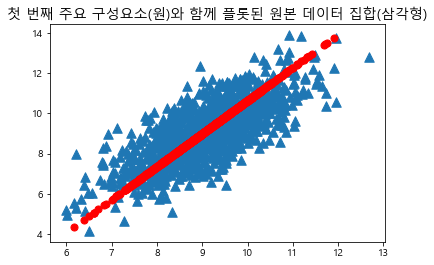

In [24]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import matplotlib
import matplotlib.pyplot as plt

lowDMat, reconMat = pca(dataMat, 1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:, 0].flatten().A[0], dataMat[:, 1].flatten().A[0], marker='^', s=90)
ax.scatter(reconMat[:, 0].flatten().A[0], reconMat[:, 1].flatten().A[0], marker='o', s=50, c='red')
plt.title('첫 번째 주요 구성요소(원)와 함께 플롯된 원본 데이터 집합(삼각형)', fontsize=14)
plt.show()

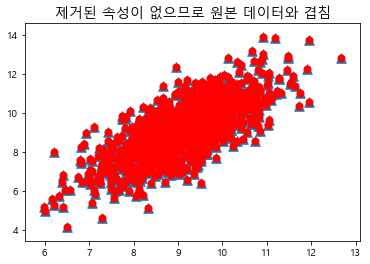

In [25]:
# 사용할 상위 2개의 속성
lowDMat, reconMat = pca(dataMat, 2)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:, 0].flatten().A[0], dataMat[:, 1].flatten().A[0], marker='^', s=90)
ax.scatter(reconMat[:, 0].flatten().A[0], reconMat[:, 1].flatten().A[0], marker='o', s=50, c='red')
plt.title('제거된 속성이 없으므로 원본 데이터와 겹침', fontsize=14)
plt.show()

### 예제: PCA로 반도체 제조 데이터 차원 축소하기

In [27]:
import pandas as pd

In [74]:
def replaceNanWithMean(): 
    datMat = loadDataSet('secom.txt', ' ')
    numFeat = shape(datMat)[1]
    for i in range(numFeat):
        meanVal = mean(datMat[nonzero(~isnan(datMat[:,i].A))[0],i]) #values that are not NaN (a number)
        datMat[nonzero(isnan(datMat[:,i].A))[0],i] = meanVal  #set NaN values to mean
    
    return datMat

In [73]:
SemiData.to_csv(r'secom.txt', header=None, index=None, sep=' ', na_rep = 'NaN')

In [79]:
SemiData.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [64]:
Data = pd.read_table('secom.txt', sep = ' ', header = None)
Data.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


NaN 값을 평균으로 대체

In [81]:
dataMat = replaceNanWithMean()
dataMat

matrix([[3.03093000e+03, 2.56400000e+03, 2.18773330e+03, ...,
         1.64749042e-02, 5.28333333e-03, 9.96700663e+01],
        [3.09578000e+03, 2.46514000e+03, 2.23042220e+03, ...,
         2.01000000e-02, 6.00000000e-03, 2.08204500e+02],
        [2.93261000e+03, 2.55994000e+03, 2.18641110e+03, ...,
         4.84000000e-02, 1.48000000e-02, 8.28602000e+01],
        ...,
        [2.97881000e+03, 2.37978000e+03, 2.20630000e+03, ...,
         8.60000000e-03, 2.50000000e-03, 4.35231000e+01],
        [2.89492000e+03, 2.53201000e+03, 2.17703330e+03, ...,
         2.45000000e-02, 7.50000000e-03, 9.34941000e+01],
        [2.94492000e+03, 2.45076000e+03, 2.19544440e+03, ...,
         1.62000000e-02, 4.50000000e-03, 1.37784400e+02]])

In [82]:
meanVals = mean(dataMat, 0)
meanVals

matrix([[ 3.01445290e+03,  2.49585023e+03,  2.20054732e+03,
          1.39637663e+03,  4.19701314e+00,  1.00000000e+02,
          1.01112908e+02,  1.21821502e-01,  1.46286166e+00,
         -8.41022364e-04,  1.45750799e-04,  9.64352780e-01,
          1.99956809e+02,  0.00000000e+00,  9.00537052e+00,
          4.13086035e+02,  9.90760281e+00,  9.71443926e-01,
          1.90047354e+02,  1.24810340e+01,  1.40505424e+00,
         -5.61839361e+03,  2.69937843e+03, -3.80629973e+03,
         -2.98598136e+02,  1.20384473e+00,  1.93847681e+00,
          6.63862799e+00,  6.94995323e+01,  2.36619744e+00,
          1.84158914e-01,  3.67318939e+00,  8.53374687e+01,
          8.96027854e+00,  5.05826386e+01,  6.45557870e+01,
          4.94173705e+01,  6.62212736e+01,  8.68365766e+01,
          1.18679554e+02,  6.79049093e+01,  3.35306617e+00,
          7.00000000e+01,  3.55538904e+02,  1.00311650e+01,
          1.36743060e+02,  7.33672811e+02,  1.17795811e+00,
          1.39972231e+02,  1.00000000e+0

In [83]:
meanRemoved = dataMat - meanVals
meanRemoved

matrix([[ 1.64771044e+01,  6.81497692e+01, -1.28140177e+01, ...,
          2.77555756e-17,  1.99493200e-17,  1.70530257e-13],
        [ 8.13271044e+01, -3.07102308e+01,  2.98748823e+01, ...,
          3.62509579e-03,  7.16666667e-04,  1.08534434e+02],
        [-8.18428956e+01,  6.40897692e+01, -1.41362177e+01, ...,
          3.19250958e-02,  9.51666667e-03, -1.68098663e+01],
        ...,
        [-3.56428956e+01, -1.16070231e+02,  5.75268229e+00, ...,
         -7.87490421e-03, -2.78333333e-03, -5.61469663e+01],
        [-1.19532896e+02,  3.61597692e+01, -2.35140177e+01, ...,
          8.02509579e-03,  2.21666667e-03, -6.17596635e+00],
        [-6.95328956e+01, -4.50902308e+01, -5.10291771e+00, ...,
         -2.74904215e-04, -7.83333333e-04,  3.81143337e+01]])

In [85]:
covMat = cov(meanRemoved, rowvar=0)
covMat

array([[ 5.39940056e+03, -8.47962623e+02,  1.02671010e+01, ...,
        -1.67440688e-02, -5.93197815e-03,  2.87879850e+01],
       [-8.47962623e+02,  6.43649877e+03,  1.35942679e+01, ...,
         1.21967287e-02,  2.32652705e-03,  3.37335304e+02],
       [ 1.02671010e+01,  1.35942679e+01,  8.63239193e+02, ...,
        -7.59126039e-03, -2.59521865e-03, -9.07023669e+01],
       ...,
       [-1.67440688e-02,  1.21967287e-02, -7.59126039e-03, ...,
         7.75231441e-05,  2.45865358e-05,  3.22979001e-01],
       [-5.93197815e-03,  2.32652705e-03, -2.59521865e-03, ...,
         2.45865358e-05,  8.21484994e-06,  1.04706789e-01],
       [ 2.87879850e+01,  3.37335304e+02, -9.07023669e+01, ...,
         3.22979001e-01,  1.04706789e-01,  8.81006310e+03]])

In [86]:
eigVals, eigVects = linalg.eig(mat(covMat))

In [97]:
eigVals[13], eigVals[14], eigVals[105]

(113215.0319842791, 108493.84818587024, 23.164010591810722)

In [87]:
print(eigVals); len(eigVals)

[ 5.34151979e+07  2.17466719e+07  8.24837662e+06  2.07388086e+06
  1.31540439e+06  4.67693557e+05  2.90863555e+05  2.83668601e+05
  2.37155830e+05  2.08513836e+05  1.96098849e+05  1.86856549e+05
  1.52422354e+05  1.13215032e+05  1.08493848e+05  1.02849533e+05
  1.00166164e+05  8.33473762e+04  8.15850591e+04  7.76560524e+04
  6.66060410e+04  6.52620058e+04  5.96776503e+04  5.16269933e+04
  5.03324580e+04  4.54661746e+04  4.41914029e+04  4.15532551e+04
  3.55294040e+04  3.31436743e+04  2.67385181e+04  1.47123429e+04
  1.44089194e+04  1.09321187e+04  1.04841308e+04  9.48876548e+03
  8.34665462e+03  7.22765535e+03  5.34196392e+03  4.95614671e+03
  4.23060022e+03  4.10673182e+03  3.41199406e+03  3.24193522e+03
  2.74523635e+03  2.35027999e+03  2.16835314e+03  1.86414157e+03
  1.76741826e+03  1.70492093e+03  1.66199683e+03  1.53948465e+03
  1.33096008e+03  1.25591691e+03  1.15509389e+03  1.12410108e+03
  1.03213798e+03  1.00972093e+03  9.50542179e+02  9.09791361e+02
  8.32001551e+02  8.08898

590

In [107]:
lowDMat, reconMat = pca(dataMat)

In [110]:
lowDMat

matrix([[ 5.18389617e+03,  3.02264772e+03, -6.88386243e+02, ...,
         -2.64088995e-11, -3.47355971e-09,  3.15573295e-09],
        [ 1.86669728e+03,  4.02163902e+03,  1.50557353e+03, ...,
         -1.42447388e-11, -2.29671027e-09,  2.07752671e-09],
        [ 3.15474165e+03,  3.46198582e+03,  1.85544208e+03, ...,
         -2.44361172e-11, -3.71085421e-09,  3.34848675e-09],
        ...,
        [ 3.82121714e+03,  1.57303288e+02,  1.19846485e+03, ...,
         -3.25143189e-12, -7.92433918e-10,  7.32176186e-10],
        [ 4.27104024e+03,  1.30047276e+03, -3.81634520e+02, ...,
         -1.10869651e-11, -9.58510142e-11, -2.66696292e-11],
        [ 3.56287329e+03,  3.72760720e+03,  4.18435474e+02, ...,
         -7.11005079e-12, -1.93280178e-09,  1.82685266e-09]])